Mohamed Niyaz Sahir Khan

8802199

Evaluation of Linear and Polynomial Regression Models on Diabetes Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

Linear Model: R-squared = 0.51, MAE = 38.22, MAPE = 34.62%
Poly BMI Model: R-squared = 0.30, MAE = 48.27, MAPE = 41.90%
Poly All Model: R-squared = 0.37, MAE = 42.47, MAPE = 38.09%
Number of parameters - Linear Model: 11, Poly BMI Model: 3, Poly All Model: 66


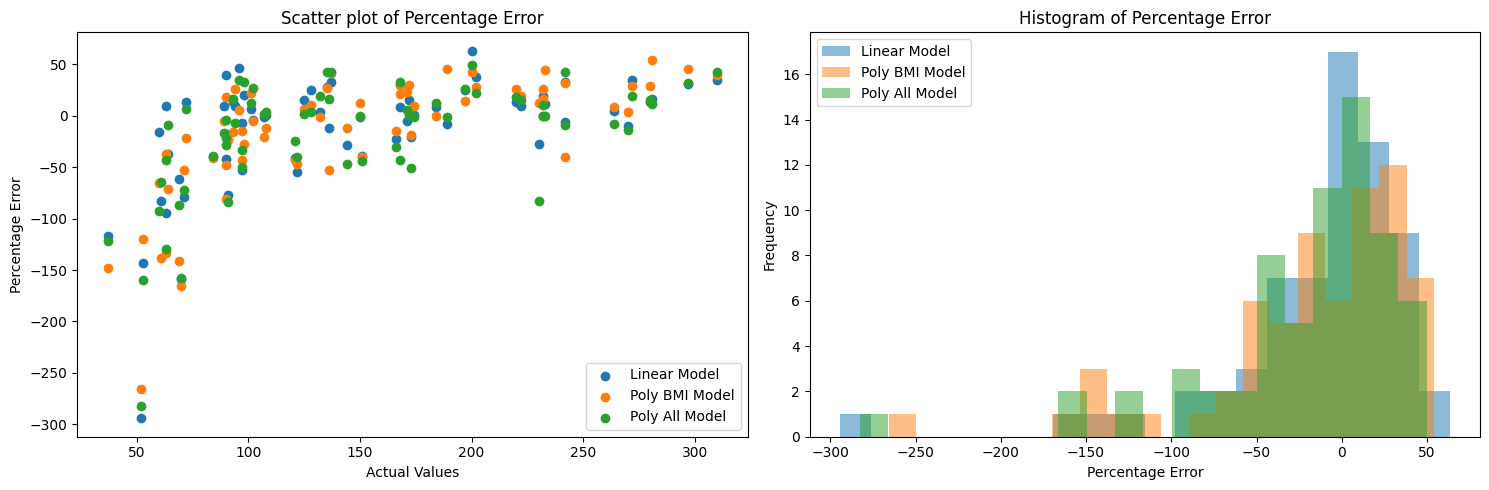

In [7]:
# Load the data and split it into training, validation, and test sets
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to compute Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    return 100 * (abs(y_true - y_pred) / y_true).mean()

#Three models are trained on the training data:

# Multivariate Linear Regression
# Polynomial Regression on BMI feature
# Multivariate Polynomial Regression

# Multivariate Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_lm = lm.predict(X_val)

# Polynomial Regression on BMI
poly_bmi = PolynomialFeatures(degree=2, include_bias=False)
X_train_bmi = X_train[["bmi"]]
X_val_bmi = X_val[["bmi"]]


X_train_bmi_poly = poly_bmi.fit_transform(X_train_bmi)
X_val_bmi_poly = poly_bmi.transform(X_val_bmi)

lm_bmi = LinearRegression()
lm_bmi.fit(X_train_bmi_poly, y_train)
y_pred_bmi = lm_bmi.predict(X_val_bmi_poly)

# Multivariate Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
y_pred_poly = lm_poly.predict(X_val_poly)

# The models are then evaluated on the validation set using R-squared, MAE, and MAPE metrics

# Evaluation
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (abs(y_true - y_pred) / y_true).mean()


# R-squared, MAE, and MAPE for each model
evaluation_metrics = {
    "Model": ["Linear", "Poly BMI", "Poly All"],
    "R-squared": [r2_score(y_val, y_pred) for y_pred in [y_pred_lm, y_pred_bmi, y_pred_poly]],
    "MAE": [mean_absolute_error(y_val, y_pred) for y_pred in [y_pred_lm, y_pred_bmi, y_pred_poly]],
    "MAPE": [mean_absolute_percentage_error(y_val, y_pred) for y_pred in [y_pred_lm, y_pred_bmi, y_pred_poly]]
}

# Print evaluation metrics
for model, r2, mae, mape in zip(evaluation_metrics["Model"], evaluation_metrics["R-squared"], evaluation_metrics["MAE"], evaluation_metrics["MAPE"]):
    print(f"{model} Model: R-squared = {r2:.2f}, MAE = {mae:.2f}, MAPE = {mape:.2f}%")

# Number of Parameters
# The number of parameters is the count of coefficients plus the intercept term.
num_params_lm = len(lm.coef_) + 1
num_params_bmi = len(lm_bmi.coef_) + 1
num_params_poly = len(lm_poly.coef_) + 1

print(f"Number of parameters - Linear Model: {num_params_lm}, Poly BMI Model: {num_params_bmi}, Poly All Model: {num_params_poly}")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot of Percentage Error
for y_pred, label in zip([y_pred_lm, y_pred_bmi, y_pred_poly], ['Linear', 'Poly BMI', 'Poly All']):
    percentage_error = 100 * (y_val - y_pred) / y_val
    axs[0].scatter(y_val, percentage_error, label=f'{label} Model')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Percentage Error')
axs[0].set_title('Scatter plot of Percentage Error')
axs[0].legend()

# Histogram of Percentage Error
for y_pred, label in zip([y_pred_lm, y_pred_bmi, y_pred_poly], ['Linear', 'Poly BMI', 'Poly All']):
    percentage_error = 100 * (y_val - y_pred) / y_val
    axs[1].hist(percentage_error, bins=20, alpha=0.5, label=f'{label} Model')
axs[1].set_xlabel('Percentage Error')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Percentage Error')
axs[1].legend()

# Show the plots
plt.tight_layout()
plt.show()



In this case the Linear Model is the best choice among the three models based on the evaluation metrics. 

It has the highest R-squared value and the lowest MAE and MAPE values, indicating a better overall fit and lower average error.